Data Cleaning

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv("Amazon Sale Report.csv")

C:\Users\pc cam\AppData\Local\Temp\ipykernel_7648\1760764839.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Amazon Sale Report.csv")


In [39]:
df_sample = pd.read_csv("Amazon Sale Report.csv", nrows=25)
print(df_sample.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22           float64
dtype: object


In [40]:
print(df["Unnamed: 22"].unique())

[nan False]


In [41]:
df.drop("Unnamed: 22", axis=1, inplace=True)

In [42]:
print(df["currency"].unique())

['INR' nan]


In [43]:
df["currency"] = df["currency"].fillna("INR")

In [44]:
df["ship-city"]=df["ship-city"].fillna("Unknown")
df["ship-state"]=df["ship-state"].fillna("Unknown")
df["ship-postal-code"]=df["ship-postal-code"].fillna("Unknown")
df["ship-country"]=df["ship-country"].fillna("Unknown")

In [45]:
df["Courier Status"]=df["Courier Status"].fillna("Unknown")
df["Amount"]=df["Amount"].fillna(0)

In [46]:
df = df.drop(['promotion-ids', 'fulfilled-by'], axis=1)
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [47]:
# 1. VÉRIFIER combien de "Shipped" à 0€ il reste
shipped_zero = df[(df['Amount'] == 0) & (df['Status'].str.startswith('Shipped'))].shape[0]
print(f"Shipped à 0€ restants : {shipped_zero}")

# 2. Si > 0, LES SUPPRIMER VRAIMENT
if shipped_zero > 0:
    df = df[~((df['Amount'] == 0) & (df['Status'].str.startswith('Shipped')))]
    print("SUPPRIMÉS !")

# 3. VÉRIFICATION FINALE
final_check = df[df['Amount'] == 0]['Status'].value_counts()
print("RÉSULTAT FINAL :")
print(final_check)

Shipped à 0€ restants : 2536
SUPPRIMÉS !
RÉSULTAT FINAL :
Status
Cancelled                        7566
Pending                            19
Pending - Waiting for Pick Up       9
Shipping                            8
Name: count, dtype: int64


In [48]:
df.duplicated().sum()

np.int64(0)

EDA

Le dataset contient 126 439 lignes et 21 colonnes. Les types de données sont cohérents avec les attentes, à part quelques conversions nécessaires.

In [49]:
df.shape

(126439, 21)

In [50]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')

In [51]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,B09KXVBD7Z,Unknown,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,B099NRCT7B,Unknown,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126439 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               126439 non-null  int64  
 1   Order ID            126439 non-null  object 
 2   Date                126439 non-null  object 
 3   Status              126439 non-null  object 
 4   Fulfilment          126439 non-null  object 
 5   Sales Channel       126439 non-null  object 
 6   ship-service-level  126439 non-null  object 
 7   Style               126439 non-null  object 
 8   SKU                 126439 non-null  object 
 9   Category            126439 non-null  object 
 10  Size                126439 non-null  object 
 11  ASIN                126439 non-null  object 
 12  Courier Status      126439 non-null  object 
 13  Qty                 126439 non-null  int64  
 14  currency            126439 non-null  object 
 15  Amount              126439 non-null  fl

In [53]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
print(df['Date'])

0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128970   2022-05-31
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
Name: Date, Length: 126439, dtype: datetime64[ns]


In [54]:
df['ship-postal-code'] = pd.to_numeric(df['ship-postal-code'], errors='coerce')
print(df['ship-postal-code'])

0         400081.0
1         560085.0
2         410210.0
3         605008.0
4         600073.0
            ...   
128970    500013.0
128971    122004.0
128972    500049.0
128973    389350.0
128974    492014.0
Name: ship-postal-code, Length: 126439, dtype: float64


In [55]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,126439.000000,126439,126439.000000,126439.000000,126406.000000
mean,64471.351094,2022-05-12 11:04:55.057696,0.902997,621.585731,464564.676408
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32232.500000,2022-04-20 00:00:00,1.000000,432.000000,382443.000000
50%,64454.000000,2022-05-10 00:00:00,1.000000,597.000000,500035.000000
75%,96680.500000,2022-06-04 00:00:00,1.000000,774.000000,600028.000000
max,128974.000000,2022-06-29 00:00:00,8.000000,5584.000000,989898.000000
std,37218.451304,NaN,0.309701,304.234550,191372.123884


In [56]:
df['Category'].value_counts()

Category
Set              49190
kurta            48925
Western Dress    15263
Top              10441
Ethnic Dress      1126
Blouse             900
Bottom             428
Saree              163
Dupatta              3
Name: count, dtype: int64

In [57]:
cancelled_orders = df[df['Status'] == 'Cancelled']
print(f"Commandes annulées avec montant > 0: {(cancelled_orders['Amount'] > 0).sum()}")
print(f"Commandes annulées avec Qty > 0: {(cancelled_orders['Qty'] > 0).sum()}")

Commandes annulées avec montant > 0: 10766
Commandes annulées avec Qty > 0: 5631


In [58]:
# Combien de produits en moyenne par commande ?
print(f"Quantité moyenne par commande: {df['Qty'].mean()}")
print(f"Quantité max dans une commande: {df['Qty'].max()}")

Quantité moyenne par commande: 0.9029967019669564
Quantité max dans une commande: 8


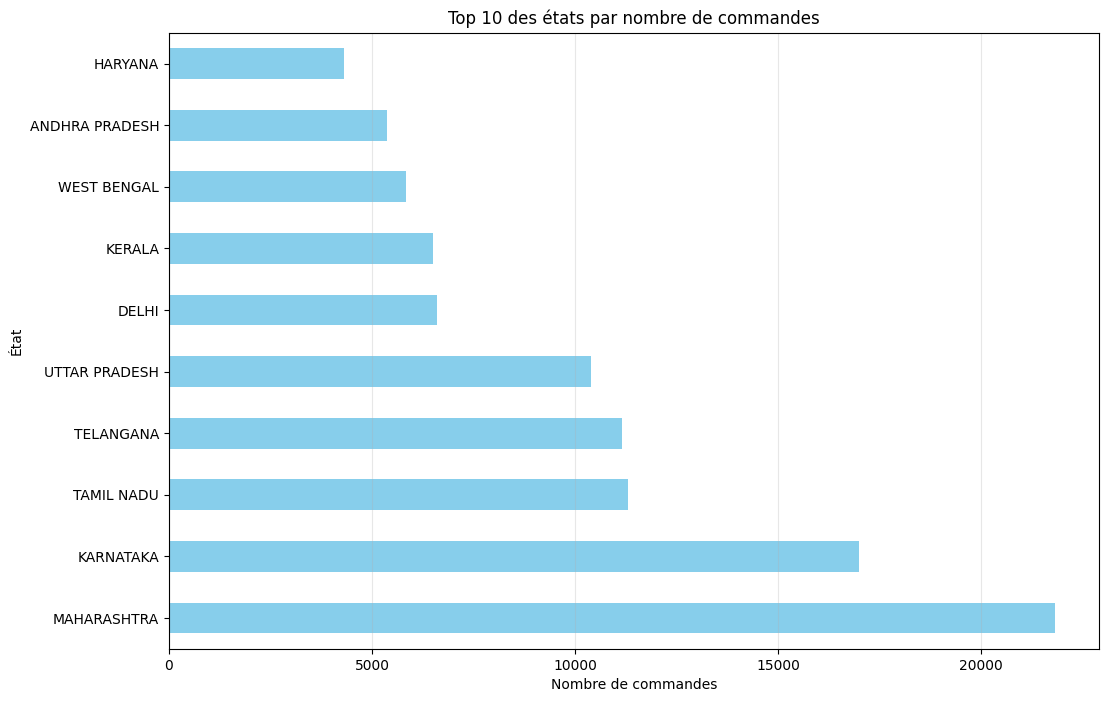

In [59]:
# Top 10 des états qui achètent le plus - Version horizontale
plt.figure(figsize=(12, 8))
df['ship-state'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 des états par nombre de commandes")
plt.xlabel("Nombre de commandes")
plt.ylabel("État")
plt.grid(axis='x', alpha=0.3)
plt.show()

In [60]:
print("Statuts des commandes :")
print(df['Status'].value_counts())

Statuts des commandes :
Status
Shipped                          76078
Shipped - Delivered to Buyer     28045
Cancelled                        18332
Shipped - Returned to Seller      1899
Shipped - Picked Up                945
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      143
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            3
Shipped - Damaged                    1
Name: count, dtype: int64


In [61]:
df.isnull().sum()

index                  0
Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city              0
ship-state             0
ship-postal-code      33
ship-country           0
B2B                    0
dtype: int64

Top catégories : Sets (49k) et Kurtas (49k) dominent les ventes
Panier moyen : 0.9 produit/commande (majorité de commandes unitaires)
Maharashtra et Karnataka sont les états les plus actifs
76% des commandes sont livrées avec succès

Data Visualization

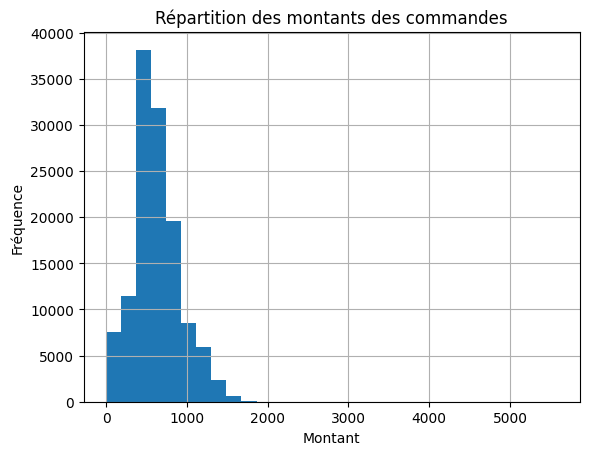

In [62]:
df['Amount'].hist(bins=30)
plt.title("Répartition des montants des commandes")
plt.xlabel("Montant")
plt.ylabel("Fréquence")
plt.show()

On observe que la majorité des commandes ont un montant faible, tandis que très peu dépassent ce montant.
Cela montre une forte concentration de petits montants.

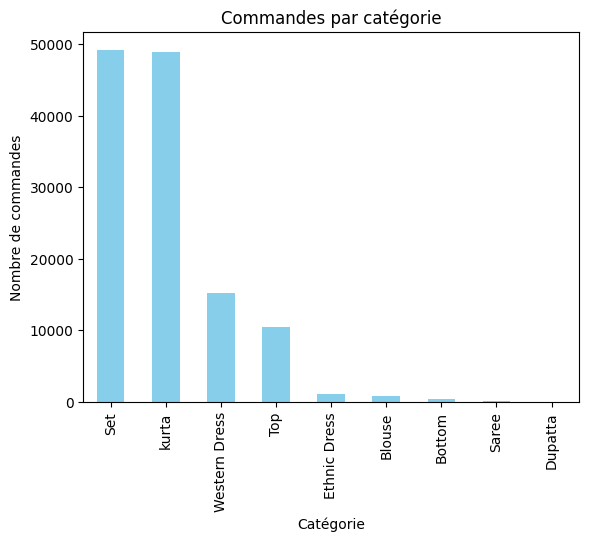

In [63]:
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Commandes par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de commandes")
plt.show()

La catégorie Set Etkutra domine largement les ventes, suivie de Western Dress. Les autres catégories génèrent très peu de commandes.

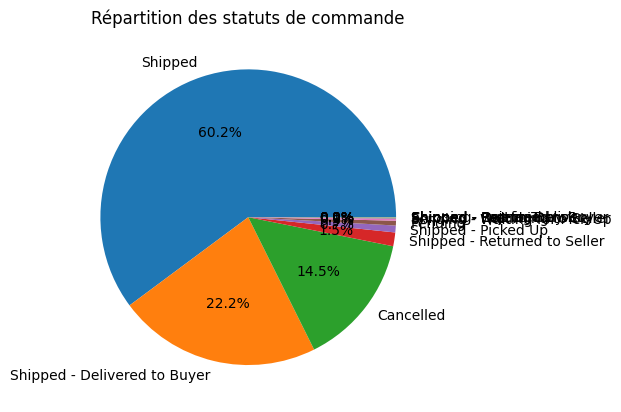

In [64]:
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition des statuts de commande")
plt.ylabel('')
plt.show()

La majorité des commandes sont livrées avec succès, mais un petit pourcentage reste annulé, ce qui peut indiquer des problèmes logistiques.

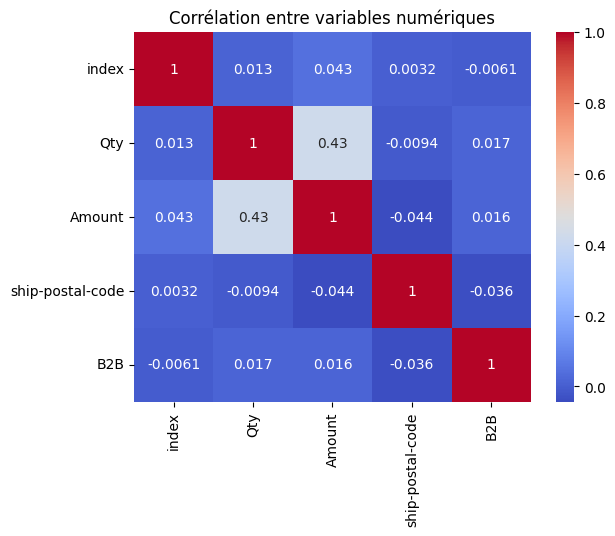

In [65]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables numériques")
plt.show()

Les variables numériques sont faiblement corrélées, ce qui signifie qu’elles varient de manière indépendante.                                                                                                                   La corrélation la plus forte est entre Amount et Qty, ce qui indique que plus les clients achètent de produits, plus ils dépensent.

Analyse finale  Amazon Sales Report

🧾 Observations principales :


La majorité des commandes ont un montant faible (≈ 500 DA), tandis que très peu dépassent ce seuil.
  Cela montre une forte concentration de petits achats.


La catégorie Set Etkutra enregistre le plus grand nombre de ventes, suivie de Western Dress, alors que les autres catégories génèrent très peu de commandes.
  Cela révèle une préférence client claire pour certains types de produits.


Le top 10 des États montre que les ventes sont fortement concentrées dans quelques régions, ce qui peut orienter des actions marketing locales.


La majorité des commandes sont livrées avec succès, et seules quelques-unes sont annulées, indiquant une bonne fiabilité du service.


L’analyse de corrélation montre que les variables numériques sont faiblement liées.
  Cela signifie que le montant dépensé et la quantité achetée ne varient pas forcément ensemble.



 Interprétation business :


Les clients achètent souvent en petites quantités et à faible montant → possibilité de créer des offres groupées ou packs promotionnels.

Miser sur les catégories populaires (comme Set Etkutra) pour augmenter le stock ou la publicité ciblée.

Surveiller les régions peu actives pour comprendre les freins (livraison, notoriété, disponibilité).

Maintenir le bon taux de livraison et analyser les rares annulations pour les réduire davantage.



En conclusion, l’analyse montre une forte concentration des ventes sur certaines catégories et régions. La majorité des montants restent faibles, mais une petite proportion de clients contribue à une part importante du chiffre d’affaires. Les corrélations suggèrent que les volumes achetés influencent directement le montant total. Ces résultats pourraient orienter les stratégies marketing vers la fidélisation des gros acheteurs et l’expansion géographique dans les régions à faible présence.